In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs
import random
import json
import time
from tabulate import tabulate
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

from kdtree import *
from utils import *

In [8]:
savefile = "data.json"
points_count = 10000

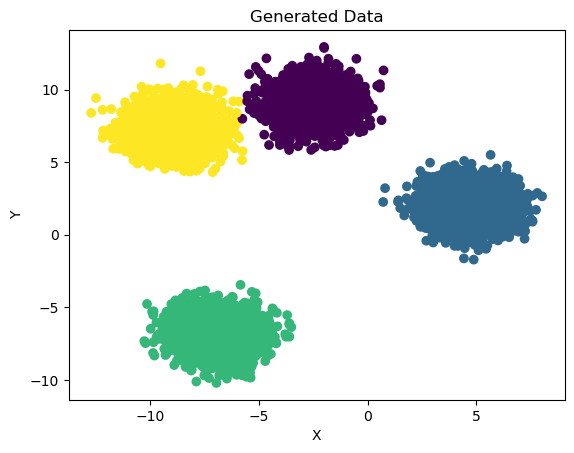

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Initialize the parameters
cluster_centers = 4  # Number of cluster centers
# Generate the data
X, y = make_blobs(
    n_samples=points_count, centers=cluster_centers, random_state=42
)
points = [(round(x , 1), round(y , 1)) for x, y in X]
maxdis = math.ceil(math.log2(points_count))

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
def build():
    tree = KDTree()
    tree.root = tree.build(points)

    G = nx.Graph()
    postoid = {pos : i for i, pos in enumerate(points)}

    for point in points:
        G.add_node(point)

    pos = {point: point for point in points}
    neighbours = {}
    maxdis = math.ceil(math.log2(points_count))
    for point in points:
        neighbours[point] = i_neighbors(tree, point, maxdis)
    return tree, G, pos, postoid, neighbours
    nx.draw(G, pos=pos, node_color="lightblue", with_labels=1, node_size=10)
    plt.show()

In [11]:
def merge_comps(core1 , core2, core_points_map , G):
    pivot2 = min(core_points_map[core2], key=lambda node: euclidean_distance(node, core1))
    pivot1 = min(core_points_map[core1], key=lambda node: euclidean_distance(node, pivot2))
    G.add_edge(pivot1, pivot2)

In [12]:
def merge_phase(G):
    core_points_map = {}
    for component in nx.connected_components(G):
        centroid = np.mean([node for node in component], axis=0)
        closest_point = min(component, key=lambda node: euclidean_distance(node, centroid))
        core_points_map[closest_point] = component

    core_points = list(core_points_map.keys())

    minc = [float("inf")] * len(core_points[0])
    maxc = [float("-inf")] * len(core_points[0])

    for point in core_points:
        for i in range(len(point)):
            minc[i] = min(minc[i], point[i])
            maxc[i] = max(maxc[i], point[i])

    diff = [maxc[i] - minc[i] for i in range(len(minc))]
    min_diff_axis = diff.index(min(diff))

    sorted_core_points = sorted(core_points, key=lambda point: point[min_diff_axis])
    for core1 , core2 in zip(sorted_core_points, sorted_core_points[1:]):
        merge_comps(core1, core2, core_points_map, G)
        
    
    

In [13]:
def dcrun():
    tree, G, pos, postoid , neighbours = build()
    k = 0
    while ( k   < maxdis) :
        print("Connected Components : " , len(connected_components))
        if(len(connected_components := list(nx.connected_components(G)))) == 1 : break
        for component in connected_components:
            for node in component:
                wt , pos = neighbours[node][k]
                if pos in component : continue
                G.add_edge(node , pos , weight = wt)
        k += 1
    else :
        merge_phase(G)
    nx.minimum_spanning_tree(G)    

In [14]:
dcrun()